In [1]:
from Node.Node import Control_node
from Plant.Plant import Plant
from Node.functions import *
import numpy as np
import time
import pylab as pl
from IPython import display
import matplotlib.pyplot as plt

## Single Node Agents

Each agent consists of:

one control node, sensing the environment and exerting control to control future perceptions, and 

one plant, which translates control signals into behaviors or changes in states.

States here are points along the x-axis. Each agent perceives **only the behavior of their counter part**, constituting the totality of the observable environment. The perception is compared to a single internal reference signal and the discrepancy between the two is used to generate a control signal. Control is "chaotic" in that the control signal is random, but related to the magnitude of the error. Moreover, the two agents share a common reference point, that is, they have the same desired goal state.

In [20]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0.1])
R2 = np.array([0.1])

# Initial behavior
behav_1 = np.array([2.5])
behav_2 = np.array([-1.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, 0.1, error)
    return control_signal

# does not adjust reference
def reference_update_false(reference, error):
    k = 0
    reference = reference + (error * k)
    return reference

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate




# agent two acts as the plant (error = control output)
def plant_control(error, behavioral_model, previous_output):
    output = previous_output + error
    return output

# just get the control output
def plant_compare(sensory_signal, reference, prediction):
    error = sensory_signal
    return error




agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_false,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

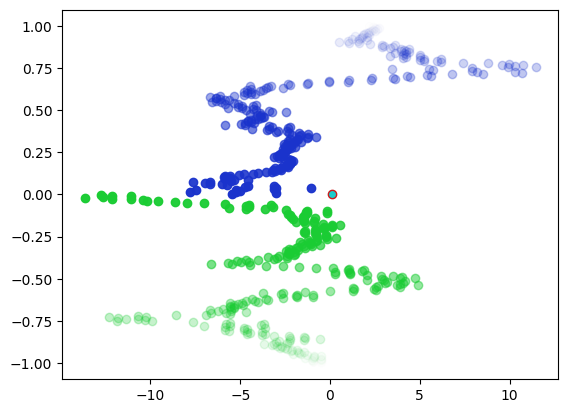

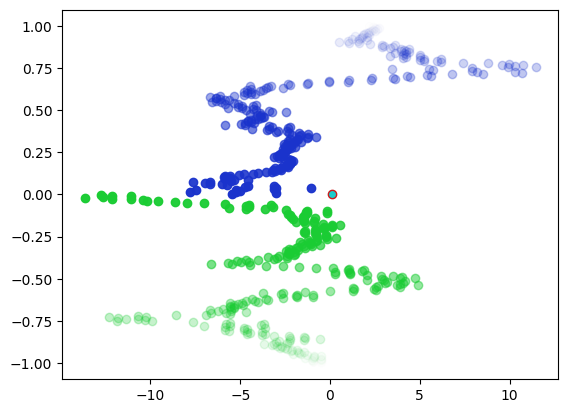

In [21]:
%matplotlib inline
np.random.seed(29)
trials = 200
color = (0.1,0.2,0.8,0.1)
agent1_control = []
agent2_control = []
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c=(0.1,0.8,0.8), edgecolors=[0.8,0.1,0.1])

for t in range(trials):
    b1_control = agent1.go(b2)   
    b2_control = agent2.go(b1)

    agent1_control.append(agent1.get_output())
    agent2_control.append(agent2.get_output())

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())


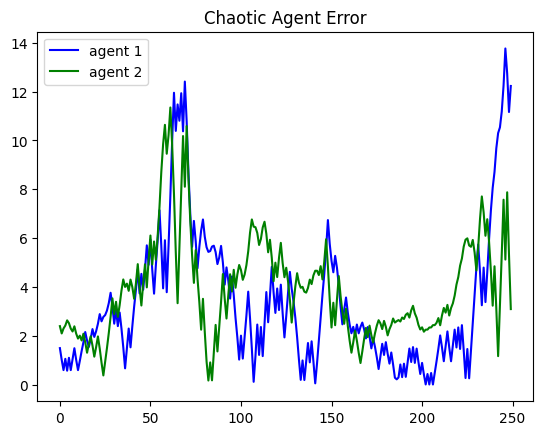

In [22]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error")
plt.show()

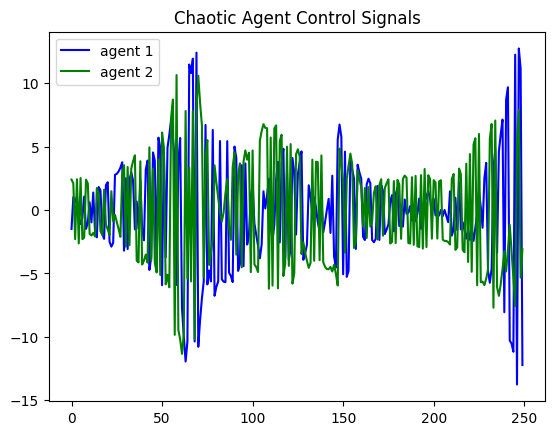

In [23]:
t = [n for n in range(trials)]
plt.plot(t, agent1_control, 'b',label="agent 1")
plt.plot(t, agent2_control, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Control Signals")
plt.show()

## Single Node Agents

Each agent consists of:

one control node, sensing the environment and exerting control to control future perceptions, and 

one plant, which translates control signals into behaviors or changes in states.

States here are points along the x-axis. Each agent perceives both their behavior as well as the behavior of their counter part, constituting the totality of the observable environment. These are averaged to generate a perception that is controllable. The perception is compared to a single internal reference signal and the discrepancy between the two is used to generate a control signal. Reference signals are still shared.

Because agents have shared reference signals and perceptions, their error signals are exactly the same.

In [ ]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([0])
R2 = np.array([0])

# Initial behavior
behav_1 = np.array([0.5])
behav_2 = np.array([-1.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

# get the state observation (behaviors of others)
def sense(inputs):
    perception = np.mean(inputs, axis=0)
    return perception


agent1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, 
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, 
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

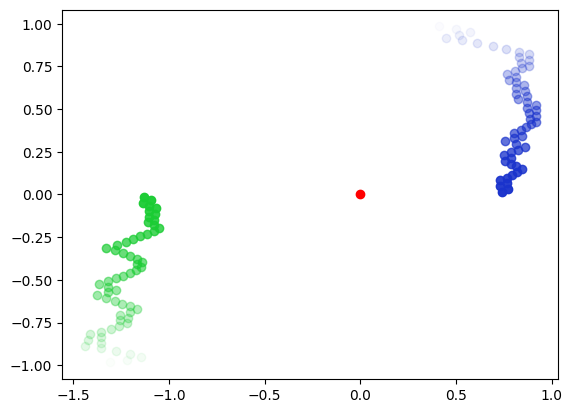

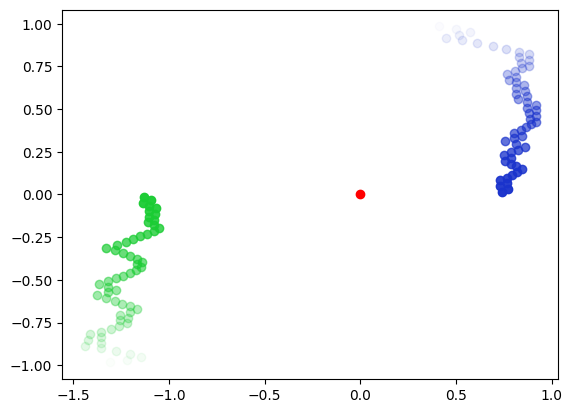

In [ ]:
%matplotlib inline
trials = 60
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R1[0],0, c='red')
for t in range(trials):
    #world is the behaviors of both agents
    world = np.array([b1, b2])

    b1_control = agent1.go(world)   
    b2_control = agent2.go(world)

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(agent1.get_error()))
    agent2_error.append(np.absolute(agent2.get_error()))
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.1)


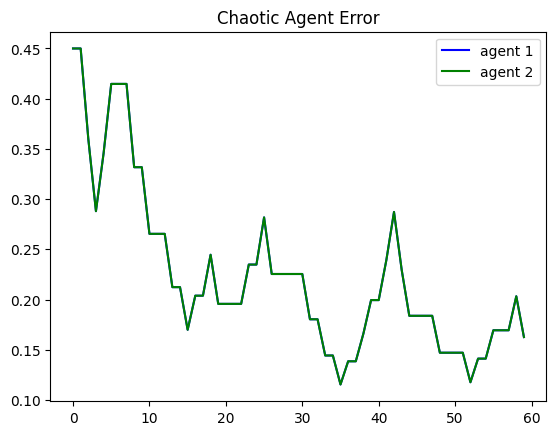

In [ ]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error")
plt.show()

## Dual Node Agents

Each agent consists of:

two control nodes, one for sensing others and controlling their behavior and another for controlling and sensing self-behaviors, and 

one plant, which translates control signals into behaviors or changes in states.

States here are points along the x-axis. Each agent perceives both their behavior as well as the behavior of their counter part, constituting the totality of the observable environment. **Observations of others goes to one control node, while the observation of self goes to another control node.** Each node sends a control signal to its plant, which averages the two signals to generate the next behavior. Agents have the same expectation/goal about their own behavior (red), but differing expectations of others (e.g. blue agent's expectation of green's behavior is the blue dot with green circle).



In [ ]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R_self1 = np.array([0])
R_other1 = np.array([1])
R_self2 = np.array([0])
R_other2 = np.array([-1])

# Initial behavior
behav_1 = np.array([0.5])
behav_2 = np.array([-1.4])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])

# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    control_signal = np.mean(control_signal, axis=0)
    new_state = (transition_matrix * control_signal) + state
    return new_state


self_control1 = Control_node(sensor=sense, comparator=compare, control_update=control_update, 
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

other_control1= Control_node(sensor=sense, comparator=compare, control_update=control_update, 
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)



self_control2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, 
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

other_control2 = Control_node(sensor=sense, comparator=compare, control_update=control_update, 
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

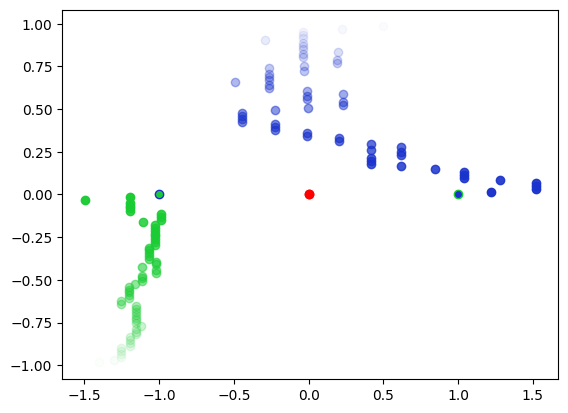

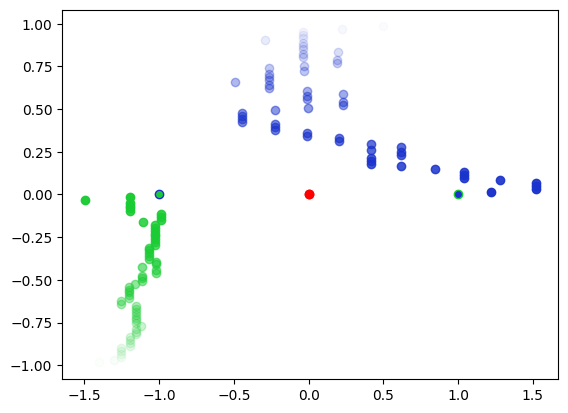

In [ ]:
%matplotlib inline
trials = 60
color = (0.1,0.2,0.8,0.1)
agent1_behaviors = []
agent2_behaviors = []
agent1_error = []
agent2_error = []

b1 = behav_1
b2 = behav_2

pl.scatter(R_self1[0],0, c="red", edgecolors='red')
pl.scatter(R_self2[0],0, c="red", edgecolors='red')
pl.scatter(R_other1[0],0, c=(0.1,0.2,0.8), edgecolors=(0.1,0.8,0.2))
pl.scatter(R_other2[0],0, c=(0.1,0.8,0.2,), edgecolors=(0.1,0.2,0.8))
for t in range(trials):
    
    b1_self_control = self_control1.go(b2)
    b1_other_control = other_control1.go(b2)    
    b2_self_control = self_control2.go(b1)
    b2_other_control = other_control2.go(b1) 
    
    b1_control = np.array([b1_self_control, b1_other_control])
    b2_control = np.array([b2_self_control, b2_other_control])

    b1 = plant1.transition(b1_control)
    b2 = plant2.transition(b2_control)

    agent1_behaviors.append(b1)
    agent2_behaviors.append(b2)

    agent1_error.append(np.absolute(self_control1.get_error())+np.absolute(other_control1.get_error()))
    agent2_error.append(np.absolute(self_control2.get_error())+np.absolute(other_control2.get_error()))
    #agent1_error.append(sum(abs(agent1.get_error())/len(agent1.get_error())))
    
    color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
    color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
    pl.scatter(b1[0],1-(t+1)/(trials+1),c=tuple(color1))
    pl.scatter(b2[0],-1+(t+1)/(trials+1),c=tuple(color2))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.1)


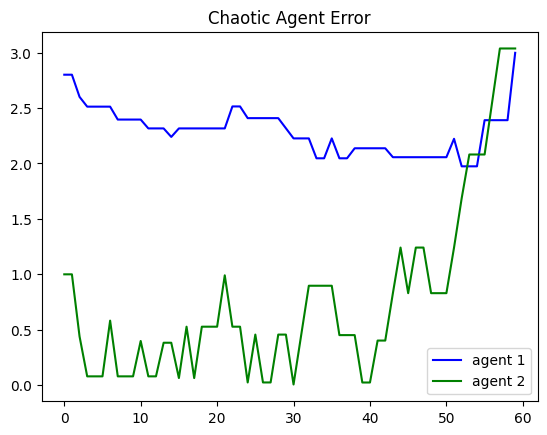

In [ ]:
t = [n for n in range(trials)]
plt.plot(t, agent1_error, 'b',label="agent 1")
plt.plot(t, agent2_error, 'g', label="agent 2")
#plt.ylim([0, 1])
plt.legend()
plt.title("Chaotic Agent Error")
plt.show()